<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB03_Pr1Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importación de librerías a utilizar
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Lectura de la base de datos
filename = 'olimpiadas.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144234,72385,Gyrgy Luntzer,M,25.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Discus Throw,NaN
144235,72385,Gyrgy Luntzer,M,25.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Athletics,"Athletics Men's Discus Throw, Both Hands",NaN
144236,72386,Luo Fangming,M,25.0,174.0,74.0,China,CHN,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,NaN
144237,72387,Luo Hengyu,M,23.0,186.0,86.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Archery,Archery Men's Individual,NaN


In [11]:
# Creamos el nuevo dataset con las variables necesarias
data = data[['Sex','Age','Height','Weight','Games','Sport','Medal']]
data.drop_duplicates()
data

,Sex,Age,Height,Weight,Games,Sport,Medal
0,M,24.0,180.0,80.0,1992 Summer,Basketball,NaN
1,M,23.0,170.0,60.0,2012 Summer,Judo,NaN
2,M,24.0,NaN,NaN,1920 Summer,Football,NaN
3,M,34.0,NaN,NaN,1900 Summer,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,1988 Winter,Speed Skating,NaN
...,...,...,...,...,...,...,...
144234,M,25.0,NaN,NaN,1912 Summer,Athletics,NaN
144235,M,25.0,NaN,NaN,1912 Summer,Athletics,NaN
144236,M,25.0,174.0,74.0,2008 Summer,Hockey,NaN
144237,M,23.0,186.0,86.0,1996 Summer,Archery,NaN


In [13]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144239 entries, 0 to 144238
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     144239 non-null  object 
 1   Age     139240 non-null  float64
 2   Height  111759 non-null  float64
 3   Weight  110183 non-null  float64
 4   Games   144239 non-null  object 
 5   Sport   144238 non-null  object 
 6   Medal   20981 non-null   object 
dtypes: float64(3), object(4)
memory usage: 7.7+ MB


<ipython-input-13-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


In [14]:
data = data.drop(data[np.isnan(data['Age'])].index)
data = data.drop(data[np.isnan(data['Weight'])].index)
data = data.drop(data[np.isnan(data['Height'])].index)
data['Medal'].fillna('None', inplace = True)

In [15]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109065 entries, 0 to 144238
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     109065 non-null  object 
 1   Age     109065 non-null  float64
 2   Height  109065 non-null  float64
 3   Weight  109065 non-null  float64
 4   Games   109065 non-null  object 
 5   Sport   109064 non-null  object 
 6   Medal   109065 non-null  object 
dtypes: float64(3), object(4)
memory usage: 6.7+ MB


<ipython-input-15-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


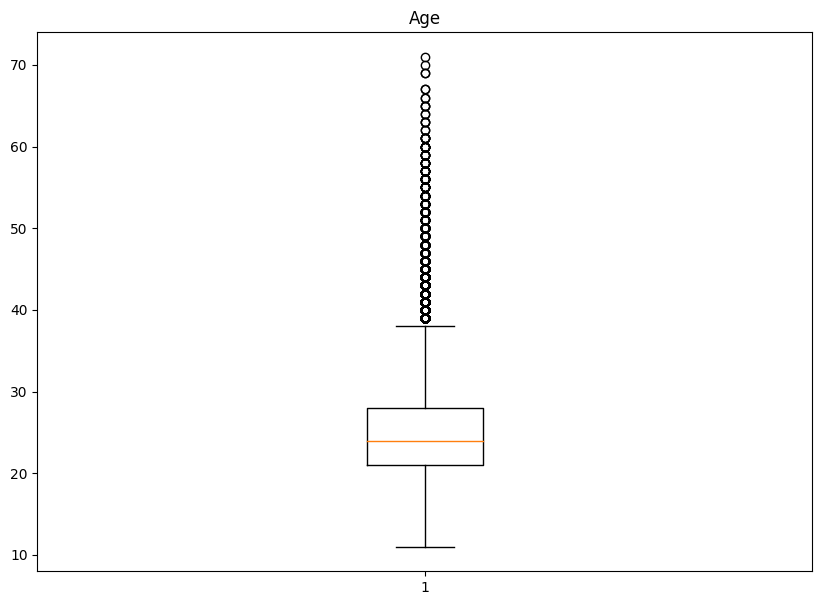

In [16]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Age"])
ax.set_title('Age')

# Dibujar gráfico
plt.show()

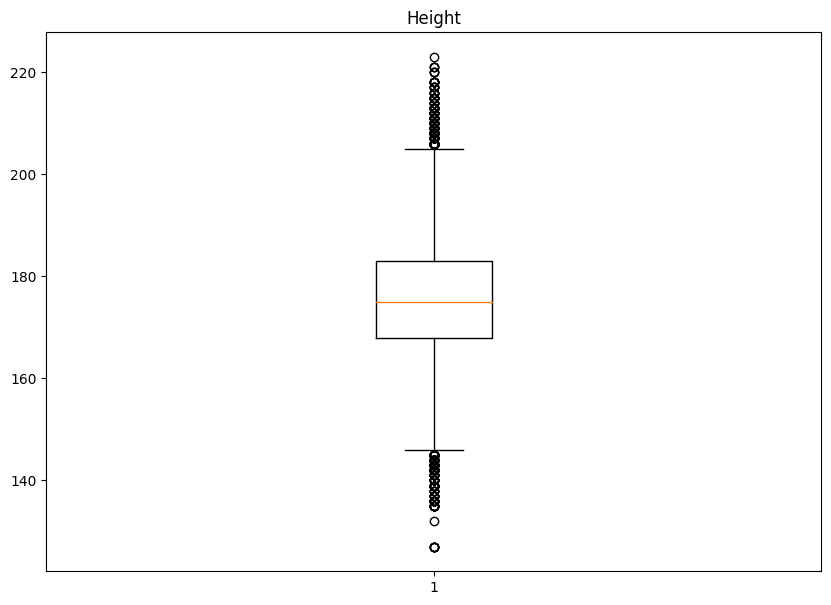

In [17]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Height"])
ax.set_title('Height')

# Dibujar gráfico
plt.show()

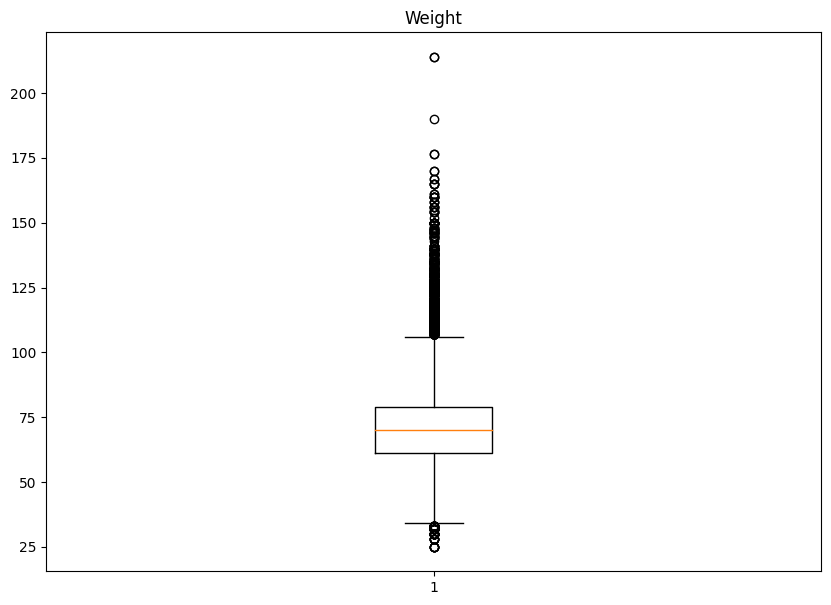

In [18]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Weight"])
ax.set_title('Weight')

# Dibujar gráfico
plt.show()

In [34]:
# Antes de nada definimos lo que es la etiqueta (y) y nuestros individuos
data = data[:5000]
X = data.drop(['Medal'], axis = 1)
y = data['Medal']

# Añadimos los individuos que queremos clasificar
bruno_hortelano = ['M',31,181,72,'2018 Winter','Athletics']
carolina_marin = ['F',29,172,65,'2020 Summer','Badminton']

# Convertir la lista en un dataframe con un solo renglón
bruno_hortelano = pd.DataFrame([bruno_hortelano], columns=X.columns)
carolina_marin = pd.DataFrame([carolina_marin], columns=X.columns)

# Añadimos los individuos
X = pd.concat([X,bruno_hortelano], ignore_index= True)
X = pd.concat([X,carolina_marin], ignore_index= True)

In [ ]:
from math import floor
from math import ceil

# Discretizamos la edad, la altura y el peso en 3 intervalos

# Edad
# calcular el rango en el que vamos a dividir las edades  
max = X['Age'].max()
min = X['Age'].min()
rango_edad = (max-min)/3

conditions = [(X['Age'] < min + rango_edad),
              ((X['Age'] >= min + rango_edad) & (X['Age'] < max - rango_edad)),
              (X['Age'] >= max - rango_edad)]

results = ["Joven","Edad media","Mayor"]

X['Age'] = np.select(conditions, results)

# Height
max = X['Height'].max()
min = X['Height'].min()
rango_altura = (max-min)/3

conditions = [(X['Height'] < min + rango_altura),
              ((X['Height'] >= min + rango_altura) & (X['Height'] < max - rango_altura)),
              (X['Height'] >= max - rango_altura)]

results = ["Bajo","Medio","Alto"]

X['Height'] = np.select(conditions, results)

# Weight
# calcular el rango intercuartílico  
max = X['Weight'].max()
min = X['Weight'].min()
rango_peso = (max-min)/3

conditions = [(X['Weight'] < min + rango_peso),
              ((X['Weight'] >= min + rango_peso) & (X['Weight'] < max - rango_peso)),
              (X['Weight'] >= max - rango_peso)]

results = ["Delgado","En forma","Pesado"]

X['Weight'] = np.select(conditions, results)

In [36]:
# Convertir los datos de tipo string a valores numéricos utilizando la codificación one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder()
X = encoder.fit_transform(X).toarray()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score

k_range = [3,5,7,9]
distancias = ['euclidean', 'manhattan', 'hamming', 'minkowski']

# Creación de la tabla
tabla = PrettyTable()
tabla.field_names = ["K","Distance","Accuracy"]

for d in distancias:
  k_scores = []
  index = 0
  for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k, metric = d)
      scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
      k_scores.append(scores.mean())

      tabla.add_row([k,d,k_scores[index]])
      index = index + 1

  plt.figure()
  plt.title(label = d)
  plt.xlabel('k')
  plt.ylabel('accuracy')
  plt.scatter(k_range, k_scores)
  plt.xticks([0,5,10])

print(tabla)

In [ ]:
# Cogemos el número de vecinos que mayor precisión tenga

def mayor(lista):
    max = lista[0];
    for x in lista:
        if x >= max:
            max = x
    return max

n_vecinos = k_scores.index(mayor(k_scores))

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

pred = classifier.predict(X_test) 
print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred))

[[   0    0   58    0]
 [   1    4   47    0]
 [   1    2 1099    2]
 [   0    1   34    1]]
              precision    recall  f1-score   support

      Bronze       0.00      0.00      0.00        58
        Gold       0.57      0.08      0.14        52
        None       0.89      1.00      0.94      1104
      Silver       0.33      0.03      0.05        36

    accuracy                           0.88      1250
   macro avg       0.45      0.28      0.28      1250
weighted avg       0.82      0.88      0.84      1250

